# Plot solid ice discharge

In [44]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [45]:
solid_ice_discharge_dir = 'C:/Users/marie/Documents/PhD/Chapter_3/data/Mankoff_discharge/solid_ice_discharge/'

Greenland Ice Sheet discharge (total)

In [3]:
GIS_discharge_ds = xr.open_dataset(solid_ice_discharge_dir + 'GIS.nc')

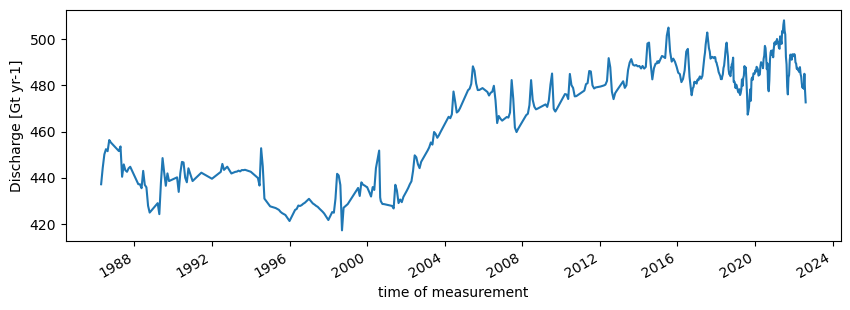

In [4]:
GIS_discharge_ds.discharge.plot(figsize=[10,3]);

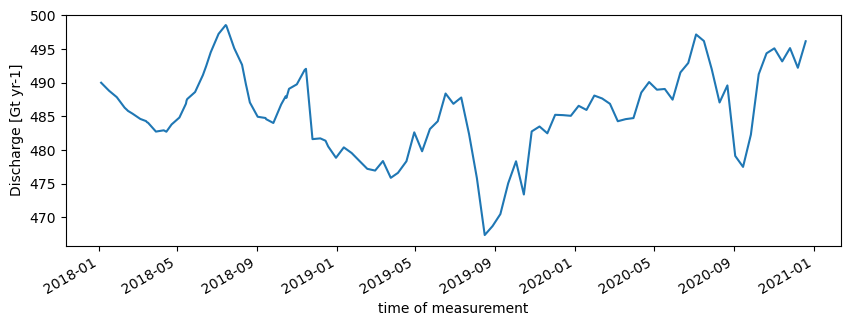

In [5]:
GIS_discharge_ds.discharge.sel(time=slice('2018','2020')).plot(figsize=[10,3]);

Discharge by region and sector

In [6]:
region_discharge_ds = xr.open_dataset(solid_ice_discharge_dir + 'region.nc')

In [7]:
# sector_discharge_ds = xr.open_dataset(solid_ice_discharge_dir + 'sector.nc')

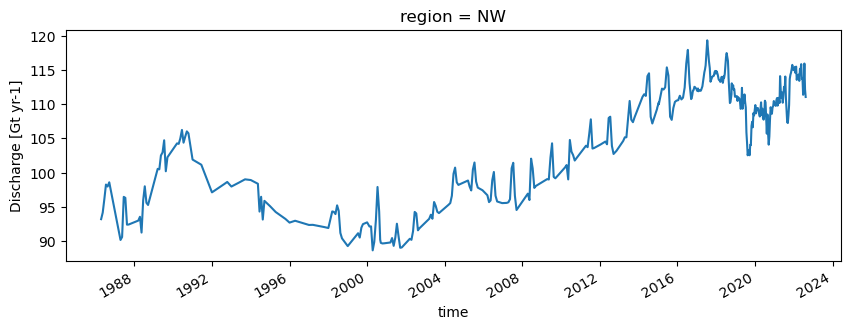

In [8]:
region_discharge_ds.sel(region='NW').discharge.plot(figsize=[10,3]);

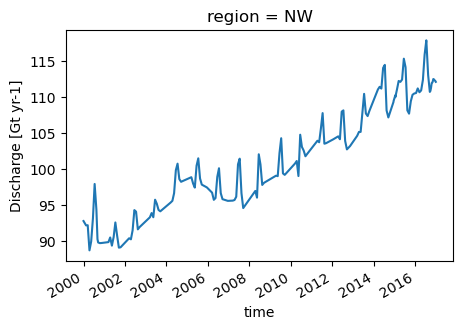

In [9]:
region_discharge_ds.sel(region='NW').sel(time=slice('2000','2016')).discharge.plot(figsize=[5,3]);

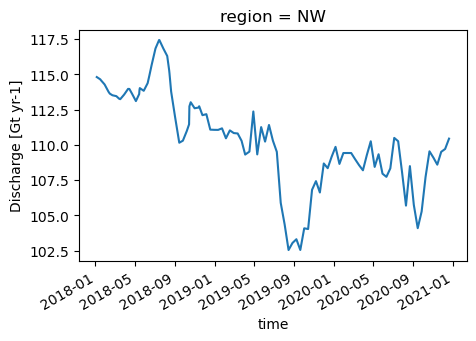

In [10]:
region_discharge_ds.sel(region='NW').sel(time=slice('2018','2020')).discharge.plot(figsize=[5,3]);

Discharge by gates

In [46]:
ice_discharge_ds = xr.open_dataset(solid_ice_discharge_dir + 'gate.nc')

**Mouginot (2019) and Bjørk (2015) names for our three fjords:** <br>
KONG_OSCAR_GLETSCHER (Nuussuup Sermia) <br>
RINK_GLETSCHER (Rink Gletsjer) <br>
SVERDRUP_GLETSCHER (Sverdrup Gletsjer) 

#### Kong Oscar

In [47]:
# get gate # for Kong Oscar
ice_discharge_ds.gate.where(ice_discharge_ds.name_Bjørk == 'Nuussuup Sermia').dropna(dim='gate').values

array([73., 77., 78.])

In [48]:
# get gate # for Kong Oscar
ice_discharge_ds.gate.where(ice_discharge_ds.name_Mouginot == 'KONG_OSCAR_GLETSCHER').dropna(dim='gate').values

array([73., 77.])

In [14]:
KO_discharge_ds = ice_discharge_ds.sel(gate=[73])

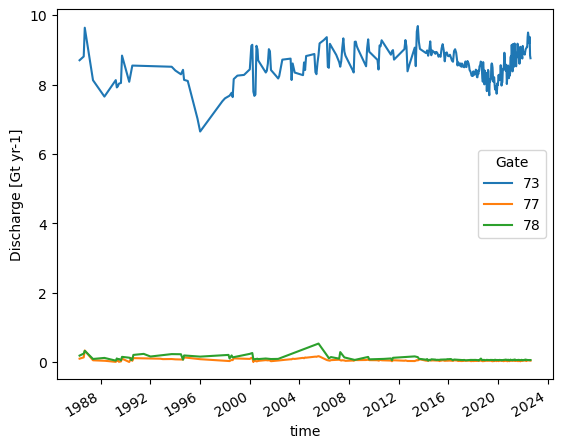

In [15]:
ice_discharge_ds.sel(gate=[73, 77, 78]).discharge.plot(hue='gate');

In [16]:
ice_discharge_ds

<xarray.Dataset>
Dimensions:        (time: 493, gate: 267)
Coordinates:
  * time           (time) datetime64[ns] 1986-04-15 1986-05-15 ... 2022-08-12
  * gate           (gate) int64 1 3 4 5 6 7 8 10 ... 350 352 353 354 355 356 357
Data variables: (12/14)
    discharge      (gate, time) float32 ...
    err            (gate, time) float32 ...
    coverage       (gate, time) float32 ...
    mean_x         (gate) int32 ...
    mean_y         (gate) int32 ...
    mean_lon       (gate) float32 ...
    ...             ...
    region         (gate) object ...
    Zwally_2012    (gate) int64 ...
    name_Bjørk     (gate) object 'Jungersen Gletsjer' ... 'Sermeq'
    name_Mouginot  (gate) object 'JUNGERSEN_HENSON_NARAVANA' ... 'SOUTHERN_TIP'
    ID_Moon        (gate) int64 ...
    ID_Moon_dist   (gate) int64 ...
Attributes:
    featureType:      timeSeries
    title:            Greenland discharge
    summary:          Greenland discharge per gate
    keywords:         Greenland; Ice Discharge; Calving; Submarine Melt
    source:           git commit: ed0b83b
    creator_name:     Ken Mankoff
    creator_email:    kdm@geus.dk
    creator_url:      http://kenmankoff.com
    institution:      GEUS
    references:       10.22008/promice/ice_discharge
    product_version:  2.0

#### Rink

In [49]:
# get gate # for Rink
ice_discharge_ds.gate.where(ice_discharge_ds.name_Bjørk == 'Rink Gletsjer').dropna(dim='gate').values

array([66.])

In [50]:
# get gate # for Rink
ice_discharge_ds.gate.where(ice_discharge_ds.name_Mouginot == 'RINK_GLETSCHER').dropna(dim='gate').values

array([66.])

In [19]:
rink_discharge_ds = ice_discharge_ds.sel(gate=[66])

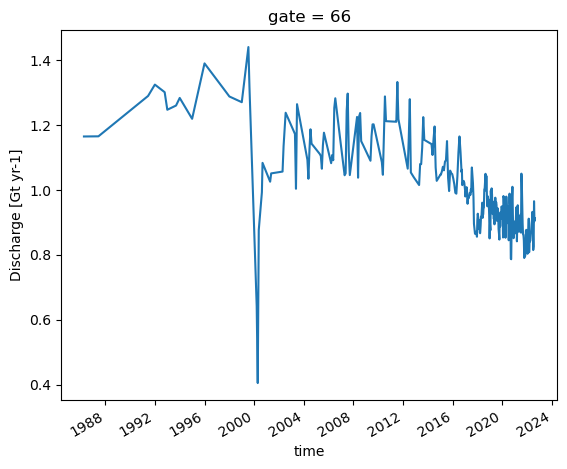

In [20]:
rink_discharge_ds.discharge.plot();

#### Sverdrup

In [21]:
# get gate # for Sverdrup
ice_discharge_ds.gate.where(ice_discharge_ds.name_Bjørk == 'Sverdrup Gletsjer').dropna(dim='gate').values

array([90., 91.])

In [22]:
# get gate # for Sverdrup
ice_discharge_ds.gate.where(ice_discharge_ds.name_Mouginot == 'SVERDRUP_GLETSCHER').dropna(dim='gate').values

array([90., 91.])

In [23]:
sver_discharge_ds = ice_discharge_ds.sel(gate=[91])

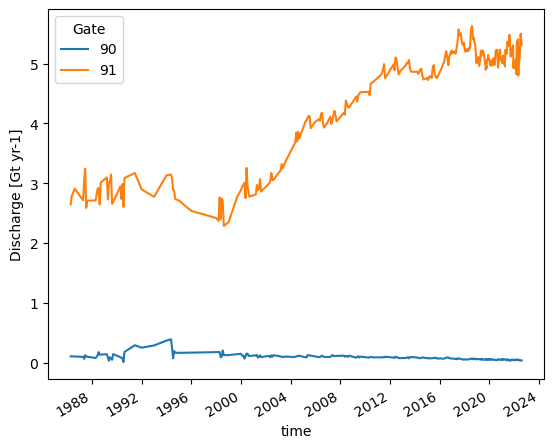

In [24]:
ice_discharge_ds.sel(gate=[90,91]).discharge.plot(hue='gate');

#### Plot all three glaciers

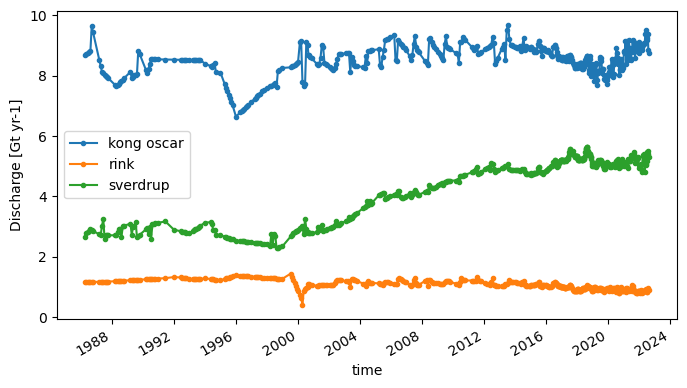

In [51]:
KO_discharge_ds.discharge.isel(gate=0).plot.line(label='kong oscar',marker=".")
rink_discharge_ds.discharge.isel(gate=0).plot.line(label='rink',marker=".")
sver_discharge_ds.discharge.isel(gate=0).plot.line(label='sverdrup',marker=".")
plt.title("")
plt.legend();

In [52]:
KO_discharge_ds.discharge.isel(gate=0).sel(time='2018').time

<xarray.DataArray 'time' (time: 49)>
array(['2018-01-05T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-01-16T00:00:00.000000000', '2018-01-17T00:00:00.000000000',
       '2018-01-29T00:00:00.000000000', '2018-02-10T00:00:00.000000000',
       '2018-02-14T00:00:00.000000000', '2018-02-15T00:00:00.000000000',
       '2018-02-22T00:00:00.000000000', '2018-03-06T00:00:00.000000000',
       '2018-03-15T00:00:00.000000000', '2018-03-16T00:00:00.000000000',
       '2018-03-18T00:00:00.000000000', '2018-03-30T00:00:00.000000000',
       '2018-04-11T00:00:00.000000000', '2018-04-15T00:00:00.000000000',
       '2018-04-23T00:00:00.000000000', '2018-05-05T00:00:00.000000000',
       '2018-05-15T00:00:00.000000000', '2018-05-16T00:00:00.000000000',
       '2018-05-17T00:00:00.000000000', '2018-05-29T00:00:00.000000000',
       '2018-06-10T00:00:00.000000000', '2018-06-15T00:00:00.000000000',
       '2018-06-22T00:00:00.000000000', '2018-07-04T00:00:00.000000000',
       '2018-07-15T00:00:00.000000000', '2018-07-16T00:00:00.000000000',
       '2018-07-28T00:00:00.000000000', '2018-08-09T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2018-08-16T00:00:00.000000000',
       '2018-08-21T00:00:00.000000000', '2018-09-02T00:00:00.000000000',
       '2018-09-14T00:00:00.000000000', '2018-09-15T00:00:00.000000000',
       '2018-09-26T00:00:00.000000000', '2018-10-08T00:00:00.000000000',
       '2018-10-15T00:00:00.000000000', '2018-10-16T00:00:00.000000000',
       '2018-10-20T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-11-13T00:00:00.000000000', '2018-11-15T00:00:00.000000000',
       '2018-11-25T00:00:00.000000000', '2018-12-07T00:00:00.000000000',
       '2018-12-15T00:00:00.000000000', '2018-12-19T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-05 2018-01-15 ... 2018-12-31
    gate     int64 73
Attributes:
    cf_role:        timeseries_id
    standard_name:  time
    axis:           T

In [53]:
ko_mean_discharge = KO_discharge_ds.discharge.isel(gate=0).sel(time=slice('2018-07-01','2020-09-30')).mean().values.round(decimals=2)
sver_mean_discharge = sver_discharge_ds.discharge.isel(gate=0).sel(time=slice('2018-07-01','2020-09-30')).mean().values.round(decimals=2)
rink_mean_discharge = rink_discharge_ds.discharge.isel(gate=0).sel(time=slice('2018-07-01','2020-09-30')).mean().values.round(decimals=2)

In [54]:
print(f'kong oscar mean discharge: {ko_mean_discharge} Gt/yr')
print(f'sverdrup mean discharge: {sver_mean_discharge} Gt/yr')
print(f'rink mean discharge: {rink_mean_discharge} Gt/yr')

kong oscar mean discharge: 8.279999732971191 Gt/yr
sverdrup mean discharge: 5.170000076293945 Gt/yr
rink mean discharge: 0.9399999976158142 Gt/yr


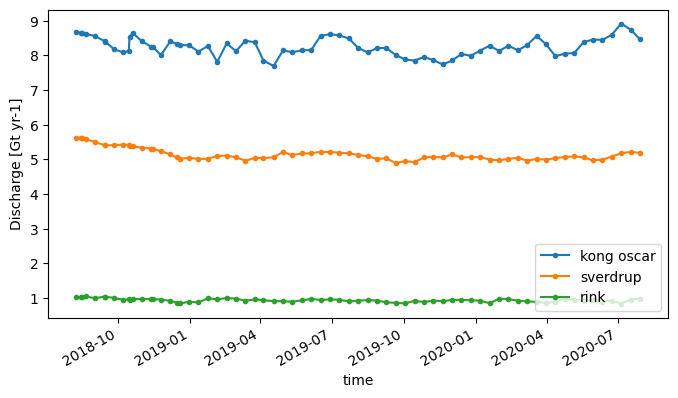

In [28]:
plt.rcParams["figure.figsize"] = (8,4)

KO_discharge_ds.discharge.isel(gate=0).sel(time=slice('2018-08-01','2020-08-01')).plot.line(label='kong oscar',marker=".")
sver_discharge_ds.discharge.isel(gate=0).sel(time=slice('2018-08-01','2020-08-01')).plot.line(label='sverdrup',marker=".")
rink_discharge_ds.discharge.isel(gate=0).sel(time=slice('2018-08-01','2020-08-01')).plot.line(label='rink',marker=".")
plt.title("")
# plt.ylim(0,1.5)

plt.legend(loc='lower right');

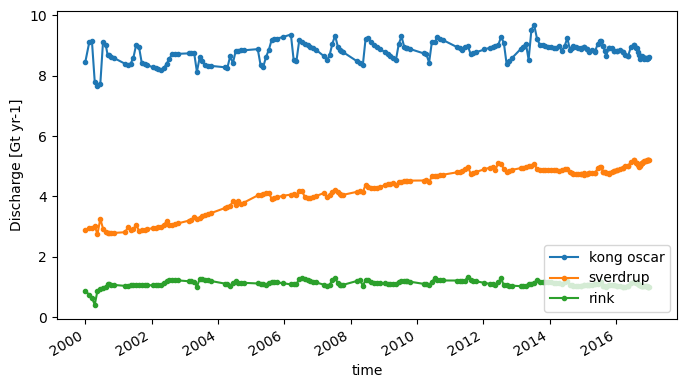

In [82]:
plt.rcParams["figure.figsize"] = (8,4)

KO_discharge_ds.discharge.isel(gate=0).sel(time=slice('2000','2016')).plot.line(label='kong oscar',marker=".")
sver_discharge_ds.discharge.isel(gate=0).sel(time=slice('2000','2016')).plot.line(label='sverdrup',marker=".")
rink_discharge_ds.discharge.isel(gate=0).sel(time=slice('2000','2016')).plot.line(label='rink',marker=".")
plt.title("")
# plt.ylim(0,1.5)

plt.legend(loc='lower right');